In [96]:

from random import randint, randrange, normalvariate, shuffle
from collections import Counter, defaultdict
from math import sqrt, log
from itertools import permutations
from statistics import mean
from numpy import linspace
from functools import wraps
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 10.0)

from scipy.stats import norm, uniform, poisson

In [101]:
def sim(delta_square):

    mu, sigma_square, tau_square, 5, 1, 10,
    Y = [9.37, 10.18, 9.16, 11.6, 10.33]

    theta = 0
    thetas = []
    accepts = []

    for s in range(10000):

        theta_star = norm.rvs(loc=theta, scale=sqrt(delta_square))

        r_log = (sum(norm.logpdf(Y, loc=theta_star, scale=sqrt(sigma_square))-
                     norm.logpdf(Y, loc=theta, scale=sqrt(sigma_square))) + 
                 norm.logpdf(theta_star, loc=mu, scale=sqrt(tau_square))-
                 norm.logpdf(theta, loc=mu, scale=sqrt(tau_square)))

        theta, accepted = (theta_star, 1) if log(uniform.rvs()) < r_log else (theta, 0)

        thetas.append(theta)
        accepts.append(accepted)

    return thetas, Counter(accepts)
        

In [112]:
thetas, accepts = sim(delta_square=1/32)

In [113]:
accepts

Counter({0: 1244, 1: 8756})

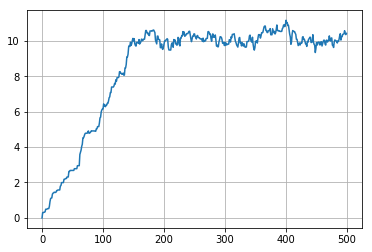

In [114]:
plt.plot(thetas[:500])
plt.grid(True)
None

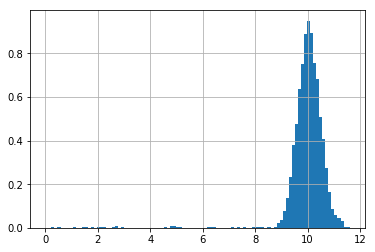

In [115]:
plt.hist(thetas, bins=100, normed=True)
plt.grid(True)
plt.show()

In [116]:
thetas, accepts = sim(delta_square=2)

In [117]:
accepts

Counter({0: 6331, 1: 3669})

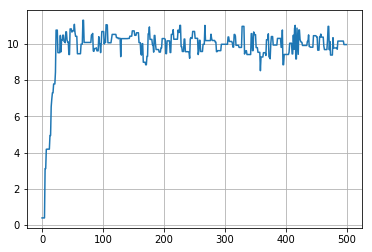

In [118]:
plt.plot(thetas[:500])
plt.grid(True)
plt.show()

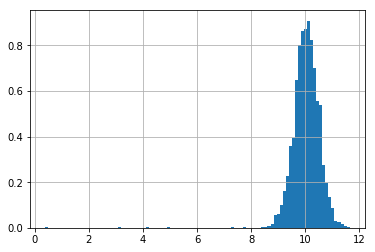

In [119]:
plt.hist(thetas, bins=100, normed=True)
plt.grid(True)
plt.show()

In [120]:
thetas, accepts = sim(delta_square=64)

In [121]:
accepts

Counter({0: 9304, 1: 696})

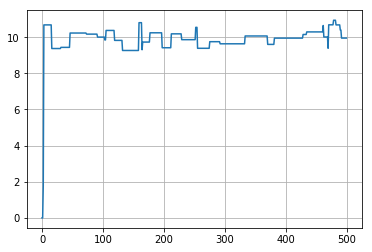

In [122]:
plt.plot(thetas[:500])
plt.grid(True)
plt.show()

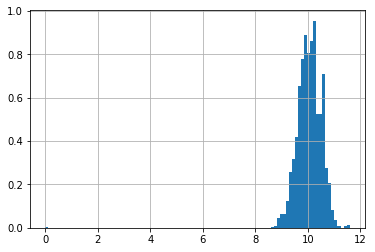

In [123]:
plt.hist(thetas, bins=100, normed=True)
plt.grid(True)
plt.show()

## Sparrows: a *Poisson* model

In [143]:
A = np.array([3, 1, 1, 2, 0, 0, 6, 3, 4, 2, 1, 6, 2, 3, 3, 4, 7,
2, 2, 1, 1, 3, 5, 5, 0, 2, 1, 2, 6, 6, 2, 2, 0, 2, 4, 1, 2, 5,
1, 2, 1, 0, 0, 2, 4, 2, 2, 2, 2, 0, 3, 2, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
2, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5,
5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 6, 1, 1, 9, 9, 1, 1, 1, 1, 1, 1,
1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 25, 25, 16, 16, 16, 16, 16,
16, 16, 16, 16, 16, 16, 16, 25, 16, 16, 16, 16, 25, 25, 25, 25,
9, 9, 9, 9, 9, 9, 9, 36, 1, 1]).reshape((4, 52)).T

A[:10, :]

array([[3, 1, 3, 9],
       [1, 1, 3, 9],
       [1, 1, 1, 1],
       [2, 1, 1, 1],
       [0, 1, 1, 1],
       [0, 1, 1, 1],
       [6, 1, 1, 1],
       [3, 1, 1, 1],
       [4, 1, 1, 1],
       [2, 1, 1, 1]])

In [144]:
y, X = A[:,0], A[:, 1:]
n, p = len(y), np.shape(X)[1]

In [145]:
pmn_beta, psd_beta = [0]*p, [10]*p # prior expectation and var

In [146]:
var_prop = np.var(np.log(y+1/2))*inv(X.T @ X) # proposal var
var_prop

array([[ 0.22028666, -0.15058737,  0.02221436],
       [-0.15058737,  0.1188448 , -0.01882933],
       [ 0.02221436, -0.01882933,  0.00312718]])

In [155]:
beta, accepts = [0]*p, []
S = 10000 # iterations
B = np.zeros((S, p))

In [156]:
for s in range(S):
    
    beta_p = np.random.multivariate_normal(beta, var_prop)
    lhr = sum(poisson.logpmf(y, np.exp(X @ beta_p)) - 
              poisson.logpmf(y, np.exp(X @ beta))) + \
          sum(norm.logpdf(beta_p, pmn_beta, psd_beta) - 
              norm.logpdf(beta, pmn_beta, psd_beta))
    beta, accepted = (beta_p, 1) if log(uniform.rvs()) < lhr else (beta, 0)
    accepts.append(accepted)
    B[s,:]=beta

In [157]:
Counter(accepts)

Counter({0: 5798, 1: 4202})

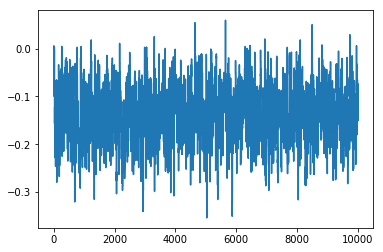

In [177]:
beta3 = B[:, -1]
plt.plot(beta3)
plt.show()

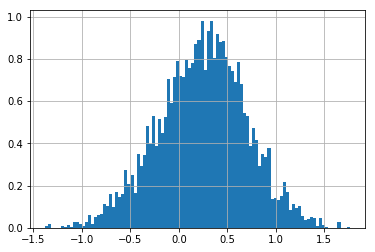

In [169]:
plt.hist(B[:, 0], bins=100, normed=True)
plt.grid(True)
plt.show()

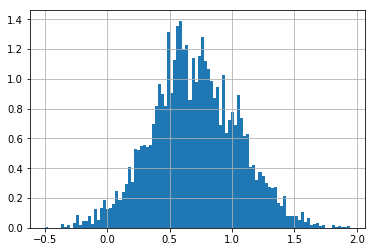

In [170]:
plt.hist(B[:, 1], bins=100, normed=True)
plt.grid(True)
plt.show()

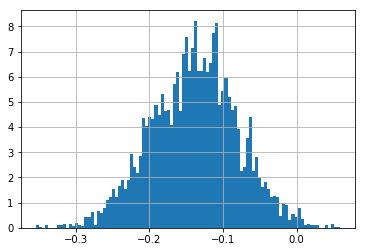

In [173]:
plt.hist(B[:, 2], bins=100, normed=True)
plt.grid(True)
plt.show()

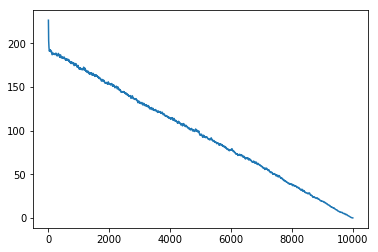

In [176]:
result = np.correlate(beta3, beta3, mode='full')
plt.plot(result[result.size//2:])
plt.show()